In [2]:
import GPy, numpy as np 
from matplotlib import pyplot as plt

In [3]:
# Use Same Data

x = np.asarray([0.1, 0.7, 1.2, 1.4, 1.6, 1.9, 2.4, 2.7, 3.1, 3.5, 3.9, 4.3, 4.8, 5.3], dtype=np.float32)
y = np.asarray([2.1, 1.6, 0.5, 0.1, 0.5, 1.2, 2.4, 3.0, 1.6, 2.3, 2.4, 1.8, 1.2, 2.0], dtype=np.float32)
testx = np.asarray([0.0, 0.3, 1.5, 1.8, 2.6, 3.0, 3.6, 4.2, 5.0, 5.5, 6.0, 6.5])


In [11]:
X = x[:,np.newaxis]
Y = y[:,np.newaxis]

In [12]:
m = GPy.models.GPRegression(X, Y)

In [13]:
m

GP_regression.,value,constraints,priors
rbf.variance,1.0,+ve,
rbf.lengthscale,1.0,+ve,
Gaussian_noise.variance,1.0,+ve,


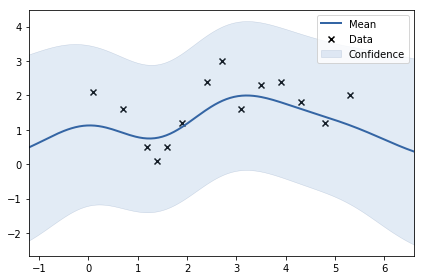

In [21]:
_= m.plot()
plt.show()

In [23]:
m.optimize(messages=1, ipython_notebook=True) 

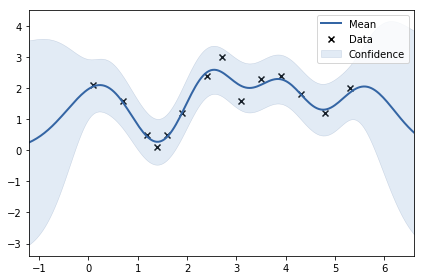

In [24]:
_= m.plot()
plt.show()


Name : gp
Objective : 18.1466649905
Number of Parameters : 3
Number of Optimization Parameters : 3
Updates : True
Parameters:
  gp.                      |           value  |  constraints  |  priors
  rbf.variance             |   2.85753954249  |      +ve      |        
  rbf.lengthscale          |  0.696702246153  |      +ve      |        
  Gaussian_noise.variance  |  0.104332930455  |      +ve      |        


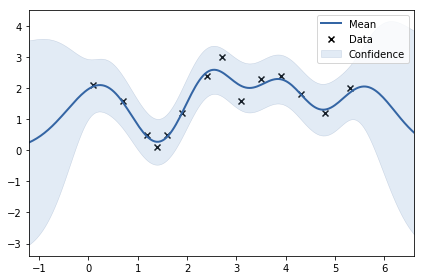

In [27]:
rbf_kern = GPy.kern.RBF(input_dim=1, lengthscale=1.0, variance=1.0)
gauss = GPy.likelihoods.Gaussian(variance=1.0)
exact = GPy.inference.latent_function_inference.ExactGaussianInference()
m1 = GPy.core.GP(X=X, Y=Y, kernel=rbf_kern, likelihood=gauss, inference_method=exact)
m1.optimize()
_ = m1.plot()
print m1
plt.show()

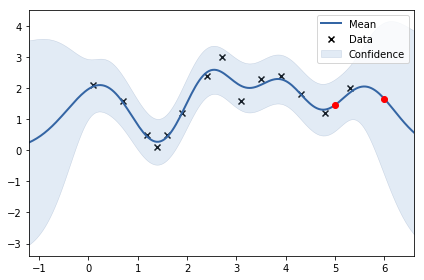

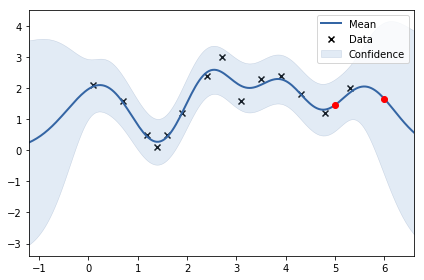

In [44]:
predictions = m1.predict(np.array([5,6, 7, 8])[:, np.newaxis])[0]
_ = m1.plot()
_.plot(np.array([5,6, 7, 8]), predictions, 'ro', label='Predictions')
plt.show()